In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 
import LucaM185  # Anything imported from my own modules is just for looks

# Linear Regression

Linear Regression answers the question: how do we find a line that fits the given data? 

Let's first generate a realistic dataset, you can think of this as hours studied (x axis) and grade 0-30 (y axis)

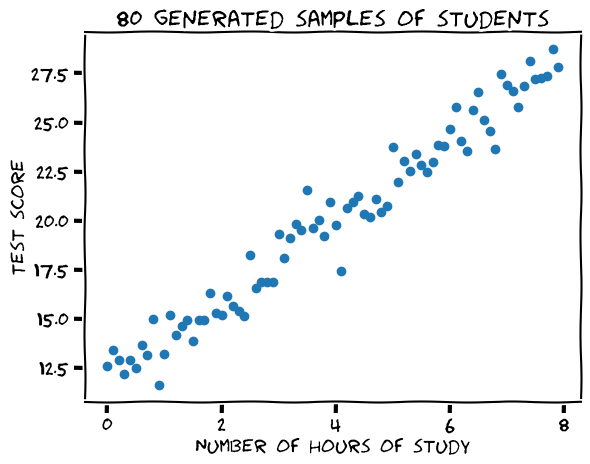

In [13]:
x = torch.arange(0, 8, 0.1)  # [0, 0.1, 0.2, ..., 7.9]

y = 2*x + 12  # y = (mx + q) --> [0, 12.2, 12.4, ..., 27.8]

y += torch.randn(x.shape[0]) # add noise  

LucaM185.linear(x, y) # presets for plot (titles, labels, etc)
plt.scatter(x, y)

Given this chart, we will try to fit the line y = mx + q by finding the "parameters" m and q to best fit the data <br> 

Now two questions arise <br>
- What does it mean to "fit" the data?
- How do we tune the best parameters? 



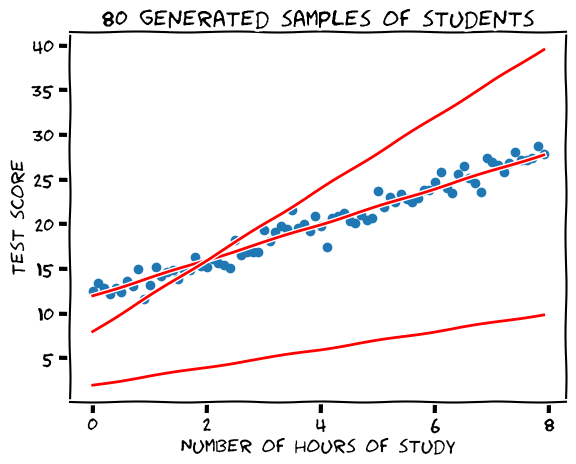

In [14]:
pred1 = 1 * x + 2  
pred2 = 2 * x + 12
pred3 = 4 * x + 8

# Plotting the predictions
plt.scatter(x, y)
LucaM185.linear(x, y)
plt.plot(x, pred1.detach().numpy(), color='red')
plt.plot(x, pred2.detach().numpy(), color='red')
plt.plot(x, pred3.detach().numpy(), color='red')


It would be helpful to have some single value that accurately describes how well the model is doing, we will call this value "loss", which is defined as the "mean squared error" over the given sample like this: 

loss = ((prediction - ideal)**2).mean()

Now that we have a function going from dataset and parameters to loss, we can use a calculus tool to optimize it, the partial derivatives can be found with specific formulas and they tell us exactly how a small change to each parameter will affect the output value. We want to minimize the loss, so we will subtract a scaled version of the derivatives to each parameter. 

In [15]:
m = 0
q = 0
lr = 0.01

In [16]:
# Training loop
for i in range(1000):
    predictions = m * x + q
    loss = ((predictions - y)**2).mean()
    
    dm = (2 * (predictions - y) * x).mean()
    dq = (2 * (predictions - y)).mean()
    # double checked, the gradient is correct

    m -= lr * dm
    q -= lr * dq

    if i % 200 == 0:
        print("Loss: ", loss.item(), "\n - m: ", m.item(), "\n - q: ", q.item(), "\n")


Loss:  420.6493225097656 
 - m:  1.793150544166565 
 - q:  0.39871945977211 

Loss:  5.222970008850098 
 - m:  2.8300468921661377 
 - q:  7.747661590576172 

Loss:  1.487385869026184 
 - m:  2.3385565280914307 
 - q:  10.321968078613281 

Loss:  0.9673370122909546 
 - m:  2.1551742553710938 
 - q:  11.282480239868164 

Loss:  0.894938588142395 
 - m:  2.0867514610290527 
 - q:  11.640862464904785 



## Logistic Regression
Logistic regression answers the following question: <br> How do we find a function that classifies a binary dataset?

/tmp/ipykernel_6340/1273800290.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(x + torch.randn(100) > 3.5).float()


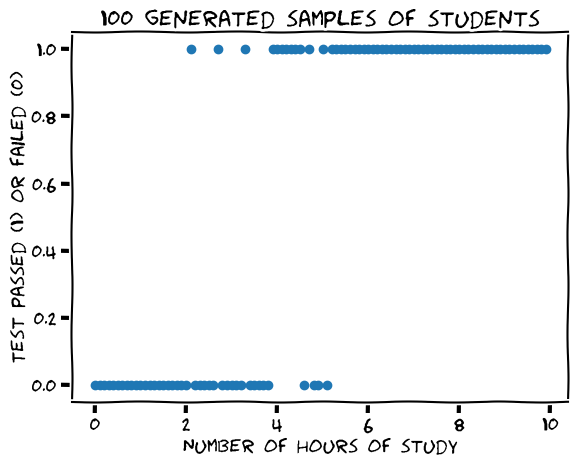

In [17]:
x = torch.arange(0, 10, 0.1)
y = torch.tensor(x + torch.randn(100) > 3.5).float()

plt.scatter(x, y)
LucaM185.logistic(x, y)

Actually, because some datapoints are scattered on top and bottom, we have to accept some level of uncertainty in the results, just as we did with Linear Regression. <br> 


So the results won't be binary but a probability of the output being one. <br>
We need a function that can scale any value to [0, 1]. We can start with sigmoid.


Interestingly, we choose activation functions such that their derivative is trivial to calculate, the derivative of sigmoid is (1-simoid(x))

In [18]:
# we add sigmoid, an activation function that squashes the output between 0 and 1
def sigmoid(x): return 1 / (1 + torch.exp(-x))

m = torch.zeros(1, requires_grad=True)
q = torch.zeros(1, requires_grad=True)
lr = 0.1

In [19]:
iterations = 1000

for i in range(iterations):
    predictions = sigmoid(m * x + q) 
    loss = ((predictions - y)**2).mean()
    loss.backward()
    
    with torch.no_grad():
        m -= lr * m.grad
        q -= lr * q.grad
        m.grad = None
        q.grad = None

    if i % 200 == 0:
        print("Loss: ", loss.item(), "\n - m: ", m.item(), "\n - q: ", q.item(), "\n")


Loss:  0.25 
 - m:  0.08105000108480453 
 - q:  0.004999999888241291 

Loss:  0.11744514107704163 
 - m:  0.38037437200546265 
 - q:  -1.050046443939209 

Loss:  0.09666366875171661 
 - m:  0.5044827461242676 
 - q:  -1.6753039360046387 

Loss:  0.08766132593154907 
 - m:  0.5912497043609619 
 - q:  -2.0878734588623047 

Loss:  0.08282668143510818 
 - m:  0.6568350791931152 
 - q:  -2.3905515670776367 



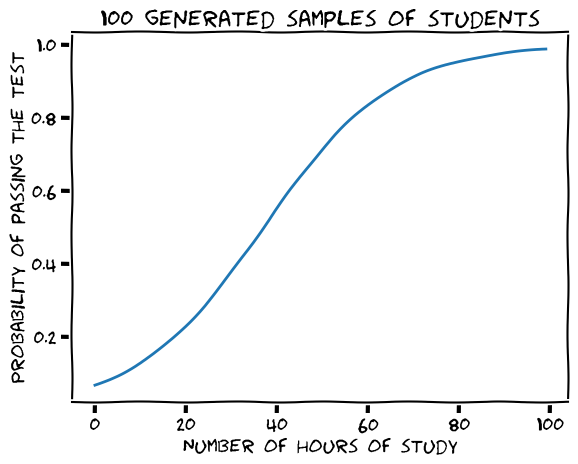

In [20]:
plt.plot(predictions.detach().numpy())
LucaM185.logistic(x, predictions.detach())

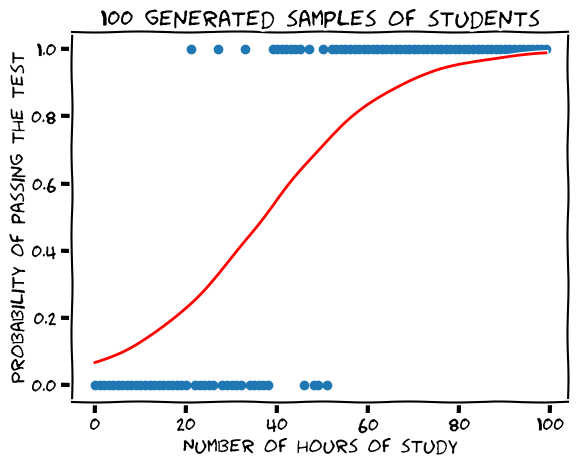

In [21]:
plt.scatter(x*10, y) # we multiply x by 10 to make the plot more readable
LucaM185.logistic(x*10, predictions.detach())
plt.plot(predictions.detach().numpy(), color='red')


As you can see we got a curve that approximates the original chart pretty well. <br>
In the future we will use different loss functions, such as tanh, relu and gelu

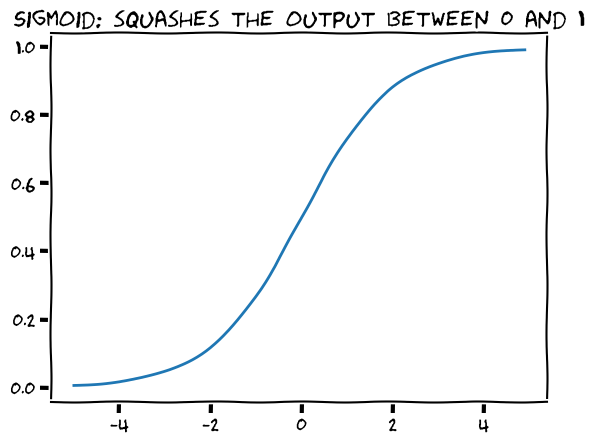

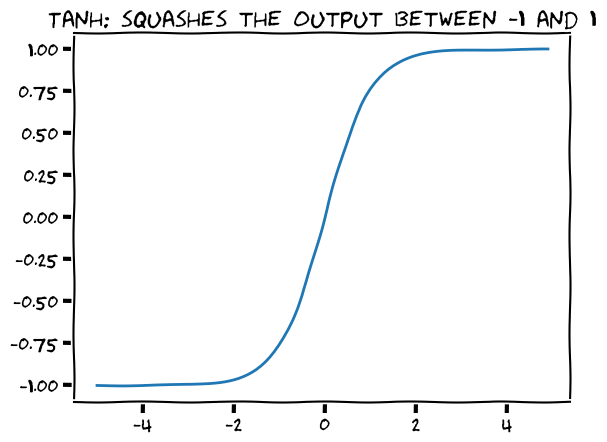

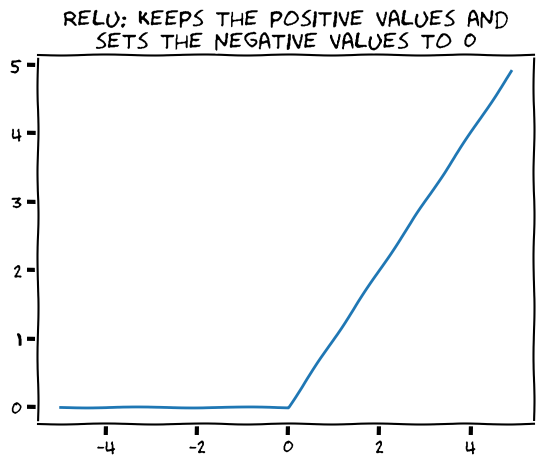

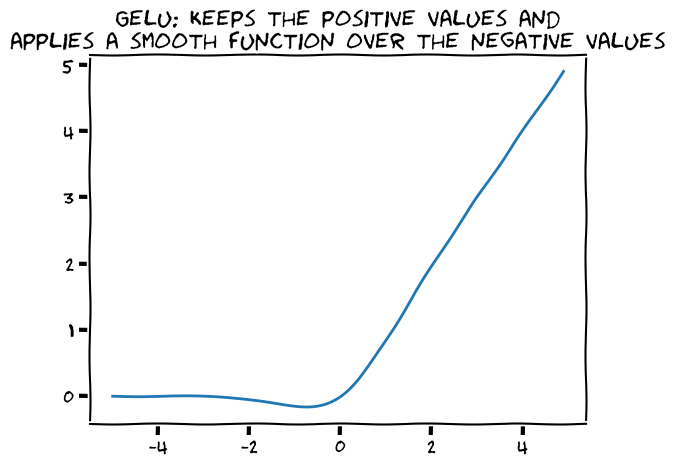

In [22]:
from torch.nn.functional import sigmoid, relu, tanh, gelu

x = torch.arange(-5, 5, 0.1)

with LucaM185.xkcdoff():  # ignore this, it's just to make the plots work better
    plt.title("Sigmoid: squashes the output between 0 and 1")
    plt.plot(x, sigmoid(x))
    plt.show()

    plt.title("Tanh: squashes the output between -1 and 1")
    plt.plot(x, tanh(x))
    plt.show()

    plt.title("Relu: keeps the positive values and\nsets the negative values to 0")
    plt.plot(x, relu(x))
    plt.show()

    plt.title("Gelu: keeps the positive values and\napplies a smooth function over the negative values") 
    plt.plot(x, gelu(x))
    plt.show()
        